In [1]:
from astropy.table import Table
from astropy.io import fits
from vtl.Readfile import Readfile
from astropy.cosmology import Planck13, z_at_value
from spec_id import Median_w_Error_cont
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [4]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')
lzDB = galDB.query('z_grism < 1.16')
mzDB = galDB.query('1.16 < z_grism < 1.3')
hzDB = galDB.query('1.3 < z_grism < 1.45')
uhzDB = galDB.query('1.45 < z_grism')

qgDB = pd.read_pickle('../data/good_spec_gal_DB.pkl')
goodss = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
                   format = 'ascii')
goodsn = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
                   format = 'ascii')
# goodss_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',
#                    format = 'ascii')
# goodsn_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',
#                    format = 'ascii')

goodss_mag = Table.read('../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat', format = 'ascii')
goodsn_mag = Table.read('../../../Clear_data/goodsn_mosaic/goodsn_3dhstP.cat', format = 'ascii')


# goodss_mag = Table.read('../../../Clear_data/goodss_3dhst.v4.3.cat', format = 'ascii')
# goodsn_mag = Table.read('../../../Clear_data/goodsn_3dhst.v4.3.cat', format = 'ascii')

# goodss = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
#                    format = 'ascii')
# goodsn = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
#                    format = 'ascii')

In [5]:
def Mag(f125):
    return 25.0-2.5*np.log10(f125)

In [7]:
specz = [] 
photz = []
photz2 = []
photzler = []
photzher = []
jband = []
# A_v = []
for i in galDB.index:
    if galDB['gids'][i][0] == 's':
        specz.append(goodss['z_spec'][int(galDB['gids'][i][1:])-1])
        photz.append(goodss['z_m1'][int(galDB['gids'][i][1:])-1])
        photz2.append(goodss['z_peak'][int(galDB['gids'][i][1:])-1])
        photzler.append(goodss['l68'][int(galDB['gids'][i][1:])-1])
        photzher.append(goodss['u68'][int(galDB['gids'][i][1:])-1])
        jband.append(Mag(goodss_mag['f_F125W'][int(galDB['gids'][i][1:])-1]))
#         A_v.append(goodss_fast['Av'][galDB['ids'][i]-1])
        
    if galDB['gids'][i][0] == 'n':
        specz.append(goodsn['z_spec'][int(galDB['gids'][i][1:])-1])
        photz.append(goodsn['z_m1'][int(galDB['gids'][i][1:])-1])
        photz2.append(goodsn['z_peak'][int(galDB['gids'][i][1:])-1])
        photzler.append(goodsn['l68'][int(galDB['gids'][i][1:])-1])
        photzher.append(goodsn['u68'][int(galDB['gids'][i][1:])-1])
        jband.append(Mag(goodsn_mag['f_F125W'][int(galDB['gids'][i][1:])-1]))
#         A_v.append(goodsn_fast['Av'][galDB['ids'][i]-1])



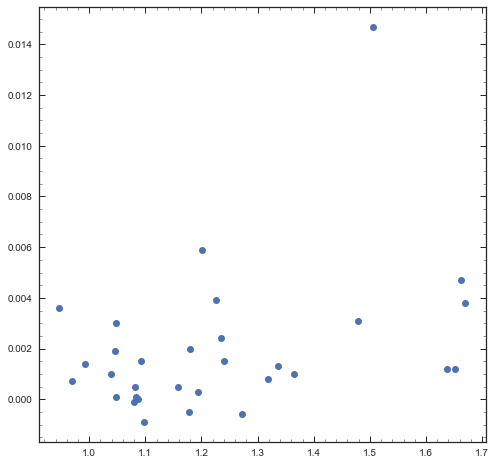

In [8]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(photz,np.array(photz) - np.array(photz2),'o')

In [19]:
np.round(photz2,2)

array([ 0.99,  1.22,  1.01,  1.2 ,  1.48,  1.09,  1.18,  1.09,  1.27,
        1.23,  1.18,  1.66,  1.08,  1.04,  1.08,  1.36,  1.16,  1.65,
        1.19,  1.24,  1.49,  1.33,  1.7 ,  1.64,  1.69,  1.04,  1.67,
        1.08,  1.05,  1.32,  1.4 ,  1.1 ,  1.14])

In [14]:
photzler

[0.95799999999999996,
 1.1830000000000001,
 0.95799999999999996,
 1.155,
 1.4239999999999999,
 1.0349999999999999,
 1.1319999999999999,
 1.052,
 1.2310000000000001,
 1.2030000000000001,
 1.143,
 1.5980000000000001,
 1.0600000000000001,
 1.006,
 1.054,
 1.3280000000000001,
 1.1259999999999999,
 1.6040000000000001,
 1.1659999999999999,
 1.212,
 1.401,
 1.298,
 1.6080000000000001,
 1.5960000000000001,
 1.6020000000000001,
 1.002,
 1.615,
 1.048,
 1.022,
 1.2869999999999999,
 1.3520000000000001,
 1.0589999999999999,
 1.0640000000000001]

In [11]:
np.round(photz,2)

array([ 0.99,  1.23,  1.01,  1.2 ,  1.48,  1.09,  1.18,  1.09,  1.27,
        1.23,  1.18,  1.66,  1.08,  1.05,  1.08,  1.36,  1.16,  1.65,
        1.19,  1.24,  1.51,  1.34,  1.72,  1.64,  1.69,  1.04,  1.67,
        1.08,  1.05,  1.32,  1.4 ,  1.1 ,  1.14])

In [12]:
A_v

[0.69999999999999996,
 0.40000000000000002,
 0.59999999999999998,
 0.80000000000000004,
 0.59999999999999998,
 0.69999999999999996,
 0.10000000000000001,
 0.29999999999999999,
 0.40000000000000002,
 0.40000000000000002,
 0.0,
 0.5,
 0.69999999999999996,
 0.5,
 0.29999999999999999,
 0.40000000000000002,
 0.10000000000000001,
 0.69999999999999996,
 0.29999999999999999,
 0.80000000000000004,
 0.80000000000000004,
 1.1000000000000001,
 1.0,
 0.40000000000000002,
 0.69999999999999996,
 0.40000000000000002,
 0.59999999999999998,
 0.5,
 0.10000000000000001,
 0.59999999999999998,
 0.29999999999999999,
 0.40000000000000002,
 0.59999999999999998]

In [11]:
np.median(A_v)

0.5

In [9]:
newids=[]

for i in galDB.index:
    
    if galDB['gids'][i][0] == 'n':
        newids.append('GND' + galDB['gids'][i][1:])
        
    if galDB['gids'][i][0] == 's':
        newids.append('GSD' + galDB['gids'][i][1:])

In [12]:
ipDB = pd.DataFrame({'gids':newids,'photz':photz2,'photz_lerr':photzler,'photz_herr':photzher,
                     'lmass':np.round(galDB['l_mass'],1), 'snr' : np.round(galDB['SNR'],1) ,'J' : np.round(jband,1)})

In [13]:
ipDB=ipDB.sort_values(['photz'], ascending=True)

In [15]:
for i in ipDB.index:
    print('%s & $%s _ {- %s} ^ {+ %s}$ & %s & %s & %s \\\\' % (ipDB['gids'][i],np.round(ipDB['photz'][i],2),
                                            np.round(ipDB['photz'][i] - ipDB['photz_lerr'][i],2),
                                            np.round(ipDB['photz_herr'][i] -ipDB['photz'][i],2),
                                            ipDB['J'][i],ipDB['lmass'][i],ipDB['snr'][i]))

GND23758 & $0.94 _ {- 0.04} ^ {+ 0.04}$ & 20.5 & 11.0 & 12.4 \\
GND37955 & $0.97 _ {- 0.03} ^ {+ 0.03}$ & 21.3 & 10.8 & 7.7 \\
GND16758 & $0.99 _ {- 0.03} ^ {+ 0.04}$ & 21.2 & 10.8 & 10.9 \\
GSD43615 & $1.04 _ {- 0.04} ^ {+ 0.04}$ & 21.7 & 10.7 & 7.6 \\
GSD42221 & $1.04 _ {- 0.04} ^ {+ 0.04}$ & 21.7 & 10.5 & 7.6 \\
GSD39241 & $1.04 _ {- 0.04} ^ {+ 0.05}$ & 20.9 & 10.9 & 12.7 \\
GSD45972 & $1.05 _ {- 0.02} ^ {+ 0.03}$ & 21.1 & 10.9 & 12.8 \\
GSD44620 & $1.08 _ {- 0.03} ^ {+ 0.03}$ & 22.1 & 10.5 & 5.6 \\
GSD39631 & $1.08 _ {- 0.03} ^ {+ 0.03}$ & 21.3 & 10.7 & 9.4 \\
GSD39170 & $1.08 _ {- 0.02} ^ {+ 0.03}$ & 20.3 & 11.1 & 21.5 \\
GND34694 & $1.09 _ {- 0.03} ^ {+ 0.04}$ & 21.0 & 10.9 & 10.6 \\
GND23435 & $1.09 _ {- 0.06} ^ {+ 0.06}$ & 22.5 & 10.3 & 4.7 \\
GSD47677 & $1.1 _ {- 0.04} ^ {+ 0.04}$ & 22.5 & 10.1 & 4.5 \\
GSD39805 & $1.16 _ {- 0.03} ^ {+ 0.03}$ & 22.5 & 10.6 & 4.4 \\
GSD38785 & $1.18 _ {- 0.03} ^ {+ 0.04}$ & 21.5 & 10.9 & 7.9 \\
GND32566 & $1.18 _ {- 0.05} ^ {+ 0.05}$ & 21.7 & 1

In [6]:
grisz_ler = []
grisz_her = []
for i in galDB.index:
    z,P = np.load('../rshift_dat/%s_hires_Pofz.npy' % galDB['gids'][i])
    med,ler,her=Median_w_Error_cont(P,z)
    grisz_ler.append(np.round(ler,3))
    grisz_her.append(np.round(her,3))

In [7]:
dust_Z = []
dust_t = []

for i in galDB.index:
    Z,PZ = np.load('../chidat/%s_dtau_Z_pos_lwa_dust.npy' % galDB['gids'][i])
    dust_Z.append(Median_w_Error_cont(PZ,Z))
    t,Pt = np.load('../chidat/%s_dtau_t_pos_lwa_dust.npy' % galDB['gids'][i])
    dust_t.append(Median_w_Error_cont(Pt,t))
    
dust_Z = np.array(dust_Z).T
dust_t = np.array(dust_t).T

In [11]:
dust_t

array([[ 3.9168337,  2.0430862,  2.5831663,  2.0981964,  2.3296593,
         3.1122244,  2.0320641,  2.8036072,  3.0681363,  2.8036072,
         2.0541082,  1.8777555,  2.2194389,  2.506012,  3.993988,
         3.0571142,  1.987976,  1.9769539,  1.9659319,  2.2635271,
         2.506012,  1.1613226,  1.8226453,  1.5470942,  1.4809619,
         3.9609218,  2.2084168,  1.9438878,  3.6853707,  3.4649299,
         2.6713427,  3.0901804,  3.0791583],
       [ 0.71643287,  0.51803607,  0.77154309,  0.41883768,  0.58416834,
         0.76052104,  0.68336673,  0.46292585,  0.4739479,  0.85971944,
         0.24248497,  0.3747495,  1.0250501,  0.52905812,  0.96993988,
         0.56212425,  0.35270541,  0.29759519,  0.46292585,  0.099198397,
         0.50701403,  0.11022044,  0.40781563,  0.28657315,  0.42985972,
         0.60621242,  0.14328657,  0.56212425,  0.87074148,  0.57314629,
         0.50701403,  0.61723447,  0.49599198],
       [ 0.749499,  0.57314629,  1.0581162,  0.30861723,  0.5841683

In [17]:

opDB = pd.DataFrame({'gids':newids,'grisz':galDB['z_grism'], 'grisz_ler':galDB['z_grism_-'],'grisz_her':galDB['z_grism_+'],
                     'Z':np.round(galDB['Zx']/0.019,2),'Z_+_sig':np.round(galDB['Zx_h']/0.019,2),
                     'Z_-_sig':np.round(galDB['Zx_l']/0.019,2),
                     't':np.round(galDB['tx'],2),'t_+_sig':np.round(galDB['tx_h'],2),
                     't_-_sig':np.round(galDB['tx_l'],2),                     
                     'tau':np.round(galDB['taux'],2),'tau_+_sig':np.round(galDB['taux_h'],2),
                     'tau_-_sig':np.round(galDB['taux_l'],2),
                     'd':np.round(galDB['dx'],2),'d_+_sig':np.round(galDB['dx_h'],2),
                     'd_-_sig':np.round(galDB['dx_l'],2)})

In [18]:
opDB=opDB.sort_values(['grisz'], ascending=True)

In [21]:
for i in opDB.index:
    print('%s & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ \\\\' % \
          (opDB['gids'][i],opDB['grisz'][i],opDB['grisz_ler'][i], opDB['grisz_her'][i],
            opDB['Z'][i],opDB['Z_-_sig'][i],opDB['Z_+_sig'][i],
            opDB['t'][i],opDB['t_-_sig'][i],opDB['t_+_sig'][i],
            opDB['tau'][i],opDB['tau_-_sig'][i],opDB['tau_+_sig'][i],
            opDB['d'][i],opDB['d_-_sig'][i],opDB['d_+_sig'][i]))
#  opDB[['gids','specz','Z','Z_+_sig','Z_-_sig','t','t_+_sig','t_-_sig']].to_latex(index=False)

GND16758 & $1.015_{-0.004}^{+0.003}$ & $1.24_{-0.33}^{+0.25}$ & $3.53_{-0.48}^{+0.73}$ & $0.32_{-0.22}^{+0.23}$ & $0.06_{-0.04}^{+0.08}$ \\
GSD39241 & $1.017_{-0.002}^{+0.003}$ & $1.23_{-0.27}^{+0.23}$ & $3.71_{-0.53}^{+0.74}$ & $0.27_{-0.19}^{+0.22}$ & $0.16_{-0.09}^{+0.11}$ \\
GSD42221 & $1.018_{-0.008}^{+0.112}$ & $1.2_{-0.49}^{+0.26}$ & $1.22_{-0.29}^{+0.86}$ & $0.24_{-0.19}^{+0.67}$ & $0.19_{-0.12}^{+0.17}$ \\
GSD43615 & $1.02_{-0.007}^{+0.004}$ & $1.13_{-0.37}^{+0.3}$ & $3.86_{-0.78}^{+0.9}$ & $0.27_{-0.19}^{+0.25}$ & $0.48_{-0.16}^{+0.2}$ \\
GSD39170 & $1.023_{-0.002}^{+0.001}$ & $1.45_{-0.17}^{+0.09}$ & $3.41_{-0.3}^{+0.21}$ & $0.54_{-0.21}^{+0.1}$ & $0.04_{-0.03}^{+0.04}$ \\
GND37955 & $1.027_{-0.008}^{+0.005}$ & $1.27_{-0.48}^{+0.23}$ & $2.67_{-0.34}^{+0.42}$ & $0.7_{-0.31}^{+0.21}$ & $0.63_{-0.24}^{+0.22}$ \\
GSD45972 & $1.041_{-0.004}^{+0.004}$ & $0.73_{-0.22}^{+0.4}$ & $3.48_{-0.76}^{+1.05}$ & $0.27_{-0.18}^{+0.25}$ & $0.07_{-0.05}^{+0.08}$ \\
GSD39631 & $1.057_{-0.021}^{+

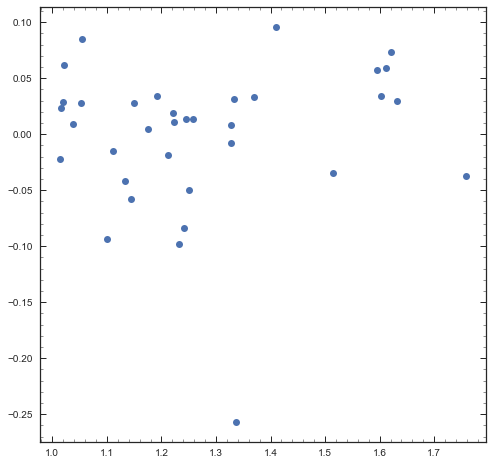

In [45]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(galDB['hi_res_specz'],photz-galDB['hi_res_specz'],'o')

In [26]:
hzDB.sort_values('z_grism')

,gids,z_grism,z_grism_+,z_grism_-,Z,Z_l,Z_h,Zx,Zx_l,Zx_h,...,taux_l,taux_h,d,d_l,d_h,dx,dx_l,dx_h,l_mass,SNR
29,s46066,1.325,0.020,0.008,0.021,0.006,0.005,0.020124,0.005331,0.005892,...,0.121040,0.169456,0.5,0.258,0.254,0.474950,0.232465,0.278557,10.85,3.433261
22,s40862,1.328,0.005,0.007,0.023,0.009,0.005,0.022537,0.008866,0.005275,...,0.127092,0.181560,0.5,0.254,0.254,0.482966,0.236473,0.270541,10.92,5.699652
16,s39804,1.333,0.005,0.004,0.019,0.006,0.007,0.018609,0.005611,0.006958,...,0.139196,0.199716,0.4,0.248,0.155,0.326653,0.174349,0.228457,10.91,5.160591
27,s44620,1.334,0.008,0.056,0.017,0.010,0.009,0.016701,0.009820,0.009483,...,0.121040,0.278392,0.7,0.363,0.172,0.615230,0.278557,0.256513,10.50,5.559990
21,s40623,1.413,0.025,0.009,0.021,0.006,0.005,0.020124,0.004882,0.005667,...,0.114988,0.151300,0.4,0.202,0.229,0.390782,0.192385,0.238477,10.76,5.594231
